In [1]:
# The '%matplotlib notebook' is a magic command in IPython.
# This command sets the Matplotlib backend to display figures in interactive notebooks.
%matplotlib notebook

# The '%matplotlib inline' is a magic command in IPython.
# This command sets the Matplotlib backend to display figures inline in the notebook, directly below the code cell that produced it.
%matplotlib inline

# The '%reload_ext autoreload' is a magic command in IPython.
# This command reloads modules automatically before entering the execution of code typed at the IPython prompt.
%reload_ext autoreload

# The '%autoreload 2' is a magic command in IPython.
# This command makes all future module imports reload automatically, it's very useful when you're modifying and testing your own modules.
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.linalg import svd, inv
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
path = r"D:\MyProjects\Python\Andrew Ng_ML_Exercise\python代码\ex7-kmeans and PCA\data\ex7faces.mat"
raw_data = loadmat(path)

In [3]:
X = raw_data.get('X')

### keep 36 components 

In [16]:
# Create a PCA object 'pca' with 36 components.
# 'PCA' is a class in the 'sklearn.decomposition' module that performs Principal Component Analysis.
# 'n_components' is the number of components to keep.
pca = PCA(n_components=36)

# Fit the PCA model to the data 'X'.
# 'fit' is a method that fits the model with 'X' and applies dimensionality reduction on 'X'.
pca.fit(X)

# Get the principal components of the fitted PCA model.
# 'components_' is an attribute of the fitted PCA object that contains the principal components.
# The shape of 'U' is (n_components, n_features), where 'n_components' is the number of components and 'n_features' is the number of features.
U = pca.components_
U.shape

(36, 1024)

#### plot eigface

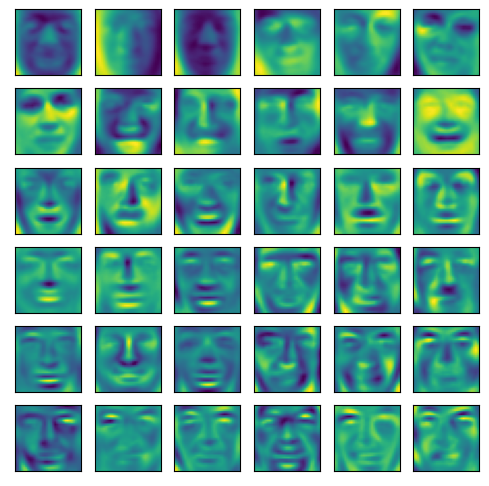

In [18]:
fig,axes = plt.subplots(nrows=6 ,ncols=6, figsize=(6,6),sharex=True,sharey=True)
for index, value in enumerate(U):
    axes[index//6][index%6].imshow(value.reshape(32,32).T)
plt.xticks([])
plt.yticks([])
plt.show()

### keep 100 components

In [21]:
# Create a PCA object 'pca' with 100 components.
# 'PCA' is a class in the 'sklearn.decomposition' module that performs Principal Component Analysis.
# 'n_components' is the number of components to keep.
pca = PCA(n_components=100)

# Fit the PCA model to the data 'X'.
# 'fit' is a method that fits the model with 'X' and applies dimensionality reduction on 'X'.
pca.fit(X)

# Get the principal components of the fitted PCA model.
# 'components_' is an attribute of the fitted PCA object that contains the principal components.
# The shape of 'U' is (n_components, n_features), where 'n_components' is the number of components and 'n_features' is the number of features.
U = pca.components_

# Apply the dimensionality reduction on 'X'.
# 'transform' is a method that applies the dimensionality reduction learned on the training data.
# The shape of 'coords' is (n_samples, n_components), where 'n_samples' is the number of samples and 'n_components' is the number of components.
coords = pca.transform(X)

# Transform data back to its original space.
# 'inverse_transform' is a method that transforms data back to its original space.
# The shape of 'X_rec' is (n_samples, n_features), where 'n_samples' is the number of samples and 'n_features' is the number of features.
X_rec = pca.inverse_transform(coords)
X_rec.shape

(5000, 1024)

#### plot X_rec and X_original 

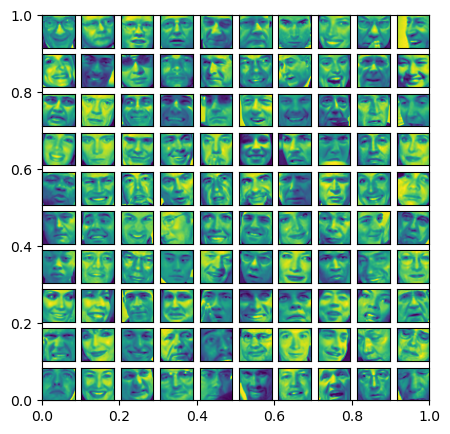

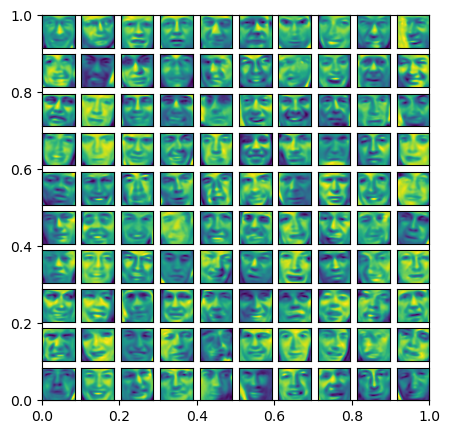

In [40]:
k = 100
fig_ori = plt.figure(figsize=(5, 5))
fig_rec = plt.figure(figsize=(5, 5))
ax_o = fig_ori.add_subplot(111)
ax_r = fig_rec.add_subplot(111)
for index, value in enumerate(zip(X[:k, :], X_rec[:k, :])):
    fig_ori.add_subplot(
        10,
        10,
        index + 1,
        xticks=[],
        yticks=[]
    ).imshow(value[0].reshape(32, 32).T)
    fig_rec.add_subplot(
        10,
        10,
        index + 1,
        xticks=[],
        yticks=[]
    ).imshow(value[1].reshape(32, 32).T)
plt.xticks([])
plt.yticks([])
plt.show()